In [1]:
#analisis de componentes principales paso a paso
#obtener los vectores y valores propios a partir de la matriz de covarianzas o de correlaciones o incluso la tecnica de sinfular vector descomposition
#Ordenar los valores propios en orden descendente y quedarnos con lo *p* que se correspondan a los *p* mayores y asi 
#construir la matriz de proyeccion  w a partir de los p vectores propios 
#transformar el dataset original X a travez de W para asi obtener datos en el subespacio dimensional de dimension p, que sera y

In [53]:
import pandas
import matplotlib.pyplot as plt 

In [3]:
df=pandas.read_csv(r"D:\Estudiar\Python\MLData\iris\iris.csv")

In [4]:
X=df.iloc[:,0:4].values
Y=df.iloc[:,4].values

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
X_std=StandardScaler().fit_transform(X)

In [7]:
##1 Calculamos la descomposicion de valores y vectores propios
#a) Usamos la Matriz de covarianza

In [8]:
from IPython.display import display, Math, Latex

In [9]:
display(Math(r"\sigma_{jk}= \frac{1}{n-1} \sum_{i=1}^m (x_{i}- \overline{x_j})(x_{ik}- \overline{}x_k"))

<IPython.core.display.Math object>

In [10]:
display(Math(r"\sigma = \frac{1}{n-1} (x-\overline{x})^T(x-\overline{x})"))

<IPython.core.display.Math object>

In [11]:
display(Math(r"\overline{x}= \sum_{i=1}^n x_i\in \mathbb R^m"))

<IPython.core.display.Math object>

In [12]:
import numpy

In [13]:
mean_vect=numpy.mean(X_std,axis=0)

In [14]:
cov_matrix=(X_std-mean_vect).T.dot((X_std-mean_vect))/(X_std.shape[0]-1)

In [15]:
cov_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [16]:
numpy.cov(X_std.T)

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [17]:
eig_vals,eig_vectors=numpy.linalg.eig(cov_matrix)
print("Valores propios \n%s"%eig_vals)
print("Vectores propios \n%s"%eig_vectors)

Valores propios 
[2.93808505 0.9201649  0.14774182 0.02085386]
Vectores propios 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [19]:
#b) Usando la MAtriz de correlaciones //es una normalizacion de la matriz de covarianza 
# #normalmente usado en ambito de las finanzas

In [23]:
corr_matrix=numpy.corrcoef(X_std.T)
corr_matrix

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [24]:
eig_vals_corr, eig_vectors_corr=numpy.linalg.eig(corr_matrix)
print("Valores propios \n%s"%eig_vals)
print("Vectores propios \n%s"%eig_vectors)

Valores propios 
[2.93808505 0.9201649  0.14774182 0.02085386]
Vectores propios 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [25]:
#c) singular values descomposicion 

In [26]:
u,s,v=numpy.linalg.svd(X_std.T)
u

array([[-0.52106591, -0.37741762,  0.71956635,  0.26128628],
       [ 0.26934744, -0.92329566, -0.24438178, -0.12350962],
       [-0.5804131 , -0.02449161, -0.14212637, -0.80144925],
       [-0.56485654, -0.06694199, -0.63427274,  0.52359713]])

In [27]:
s

array([20.92306556, 11.7091661 ,  4.69185798,  1.76273239])

In [28]:
v

array([[ 1.08239531e-01,  9.94577561e-02,  1.12996303e-01, ...,
        -7.27030413e-02, -6.56112167e-02, -4.59137323e-02],
       [-4.09957970e-02,  5.75731483e-02,  2.92000319e-02, ...,
        -2.29793601e-02, -8.63643414e-02,  2.07800179e-03],
       [ 2.72186462e-02,  5.00034005e-02, -9.42089147e-03, ...,
        -3.84023516e-02, -1.98939364e-01, -1.12588405e-01],
       ...,
       [ 5.43380310e-02,  5.12936114e-03,  2.75184277e-02, ...,
         9.89532683e-01, -1.41206665e-02, -8.30595907e-04],
       [ 1.96438400e-03,  8.48544595e-02,  1.78604309e-01, ...,
        -1.25488246e-02,  9.52049996e-01, -2.19201906e-02],
       [ 2.46978090e-03,  5.83496936e-03,  1.49419118e-01, ...,
        -7.17729676e-04, -2.32048811e-02,  9.77300244e-01]])

In [29]:
#2 las componentes principales 

In [31]:
for ev in eig_vectors:
    print("La longitud del vector propio es: %s"%numpy.linalg.norm(ev))

La longitud del vector propio es: 0.9999999999999993
La longitud del vector propio es: 0.9999999999999999
La longitud del vector propio es: 1.0000000000000002
La longitud del vector propio es: 1.0


In [35]:
eigen_pairs=[(numpy.abs(eig_vals[i]),eig_vectors[:,i]) for i in range(len(eig_vals))]
eigen_pairs

[(2.9380850501999944,
  array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])),
 (0.9201649041624878,
  array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])),
 (0.14774182104494818,
  array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])),
 (0.020853862176462533,
  array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]

In [36]:
eigen_pairs.sort()
eigen_pairs.reverse()
eigen_pairs

[(2.9380850501999944,
  array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])),
 (0.9201649041624878,
  array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])),
 (0.14774182104494818,
  array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])),
 (0.020853862176462533,
  array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]

In [40]:
total_sum=sum(eig_vals)
var_exp=[(i/total_sum)*100 for i in sorted(eig_vals,reverse=True)]
sum_var_exp=numpy.cumsum(var_exp)

In [41]:
var_exp #indica el porcentaje de que tanto explica cada vector propio

[72.96244541329986, 22.850761786701774, 3.6689218892828794, 0.5178709107154862]

In [44]:
sum_var_exp

array([ 72.96244541,  95.8132072 ,  99.48212909, 100.        ])

In [46]:
W=numpy.hstack((eigen_pairs[0][1].reshape(4,1),
                eigen_pairs[1][1].reshape(4,1)))

In [47]:
#3 Proyectando las variables en el nuevo subespacio vectorial

In [51]:
display(Math(r"Y=X \cdot W, X\in M(\mathbb R)_{150,4}, W\in M(\mathbb R)_{4,2}, Y\in M(\mathbb R)_{150,2}"))

<IPython.core.display.Math object>

In [60]:
Y=X_std.dot(W)

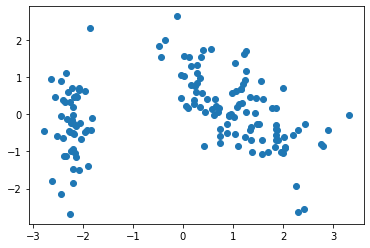

In [63]:
plt.scatter(Y[:,0],Y[:,1])